# Esercizio 02.1

Per effettuare importance sampling ho utilizzato una gaussiana centrata sull'origine: ho infatti implementato un algoritmo per campionarla (può essere fatto ad esempio attraverso il metodo Box-Muller) e inoltre è particolarmente simile alla funzione di cui va calcolato l'integrale. 
$$\frac{2}{\sqrt{2\pi \sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$$ è una gaussiana normalizzata a 1 nell'intervallo $[0,+\infty)$. per normalizzarla a 1 nell'intervallo $[0,1)$, devo dividere per il suo integrale in tale intervallo, vale a dire $$erf\Big(\frac{1}{\sigma \sqrt{2}}\Big)-erf(0)$$.
Dunque,

$$\frac{1}{\Big(erf\big(\frac{1}{\sigma \sqrt{2}}\big)-erf(0)\Big)}\frac{2}{\sqrt{2\pi \sigma^2}}e^{-\frac{x^2}{2\sigma^2}}$$ per $$x \in [0,1]$$ è una porzione di gaussiana, centrata in 0, normalizzata ad avere integrale unitario sull'intervallo [0,1]. Il mio obiettivo è quello di rendere la nostra pdf gaussiana il più possibile simile alla funzione target. Un approccio semplice che ho pensato è quello di rendere le "gobbe" che entrambe le funzioni presentano in corrispondenza dell'origine più simili possibili, eguagliando la derivata seconda nell'origine e ricavando in questo modo la deviazione standard della gaussiana. Chiaramente questa è una possibile scelta fatta solo per avere un'idea approssimativa della $\sigma$. Se ad esempio si imponesse l'uguaglianza dello sviluppo di Taylor al centro dell'intervallo magari si otterrebbero risultati migliori.

Espandendo al secondo ordine: 

$$\frac{1}{\Big(erf\big(\frac{1}{\sigma \sqrt{2}}\big)-erf(0)\Big)}\frac{2}{\sqrt{2\pi \sigma^2}}e^{-\frac{x^2}{2\sigma^2}} = \frac{1}{\Big(erf\big(\frac{1}{\sigma \sqrt{2}}\big)-erf(0)\Big)}\frac{2}{\sqrt{2\pi \sigma^2}}\Big( 1-\frac{x^2}{2\sigma^2}+o(x^2) \Big)$$

Espandendo al secondo ordine la funzione di nostro interesse:

$$\frac{\pi}{2}\cos(\pi x/2) = \frac{\pi}{2}\big(1-\frac{\pi^2}{4}x^2 + o(x^2)\big)$$

Eguaglio i termini del secondo ordine:

$$\frac{1}{erf\big(\frac{1}{\sigma \sqrt{2}}\big)}\frac{1}{\sqrt{2\pi}\sigma^3} = \frac{\pi^3}{8}$$
approssimando a 1 la funzione degli errori:
$$\frac{1}{\sqrt{2\pi}\sigma^3} = \frac{\pi^3}{8}$$
per cui ottengo una stima di un valore di sigma da usare:
$$\sigma = 0.47$$

Per la mia simulazione ho scritto una classe che svolge l'integrazioine Monte Carlo sfruttando il campionamento con la distribuzione uniforme e con la distribuzione gaussiana, e l'ho resa generale, in quanto ha come data membro una classe virtuale che rappresenta una funzione generica, dotata di un metodo "eval". Di seguito riporto i risultati ottenuti effettuando il sampling con la distribuzione uniforme e con quella gaussiana. Ho effettuato una simulazione con $10^4$ punti divisi in 100 blocchi in entrambi i casi. 

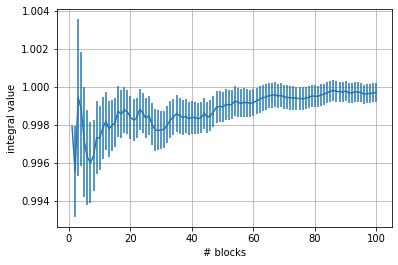

In [15]:
import matplotlib.pyplot as plt
import numpy as np

dataUnif = np.loadtxt("esercizio02_1/unifSampl.dat")

blocks = np.linspace(1, 100, 100)
plt.errorbar(blocks,dataUnif[:,0], yerr = dataUnif[:,1])
plt.grid(True)
plt.xlabel("# blocks")
plt.ylabel("integral value")
plt.show()

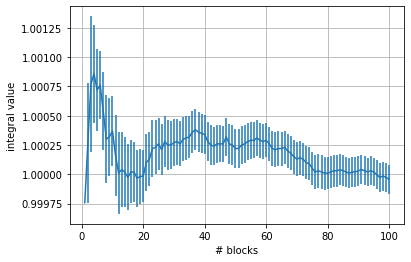

In [16]:
import matplotlib.pyplot as plt
import numpy as np

dataUnif = np.loadtxt("esercizio02_1/gaussSampl.dat")

blocks = np.linspace(1, 100, 100)
plt.errorbar(blocks,dataUnif[:,0], yerr = dataUnif[:,1])
plt.grid(True)
plt.xlabel("# blocks")
plt.ylabel("integral value")
plt.show()

Notiamo come nel caso di importance sampling con distribuzione gaussiana la stima dell'integrale converga più velocemente al valore atteso di 1 e gli errori siano più ridotti (attorno al blocco 40 ad esempio c'è uno scarto di 0.00025 dal valore vero, con un errore di 0.0002 nel caso di importance sampling, mentre nel caso di distribuzione uniforme c'è uno scarto di 0.0015, con un errore di 0.001).

# Esercizio 02.2

Ho simulato il random walk sia sul reticolo cubico che nello spazio isotropo. Di seguito presento e discuto i risultati ottenuti.

## Random walk su reticolo cubico

Notazione: nel grafico ho indicato come primo step la posizione iniziale (0,0,0). Ecco come si presenta un tipico random walk simulato.

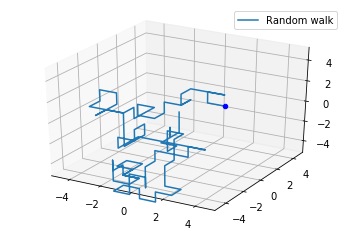

In [37]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

dataCubic = np.loadtxt("esercizio02_2/cubicJourn.dat")
x = dataCubic[:,0]
y = dataCubic[:,1]
z = dataCubic[:,2]

ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)

ax.plot(x, y, z, label='Random walk')
ax.scatter(x[-1], y[-1], z[-1], c='b', marker='o')   # End point
ax.legend()
plt.show()

Ho prodotto un grafico di $\sqrt{<r^2>_{RW}}$  con le relative incertezze calcolate con il data blocking (numero di blocchi pari a 100).

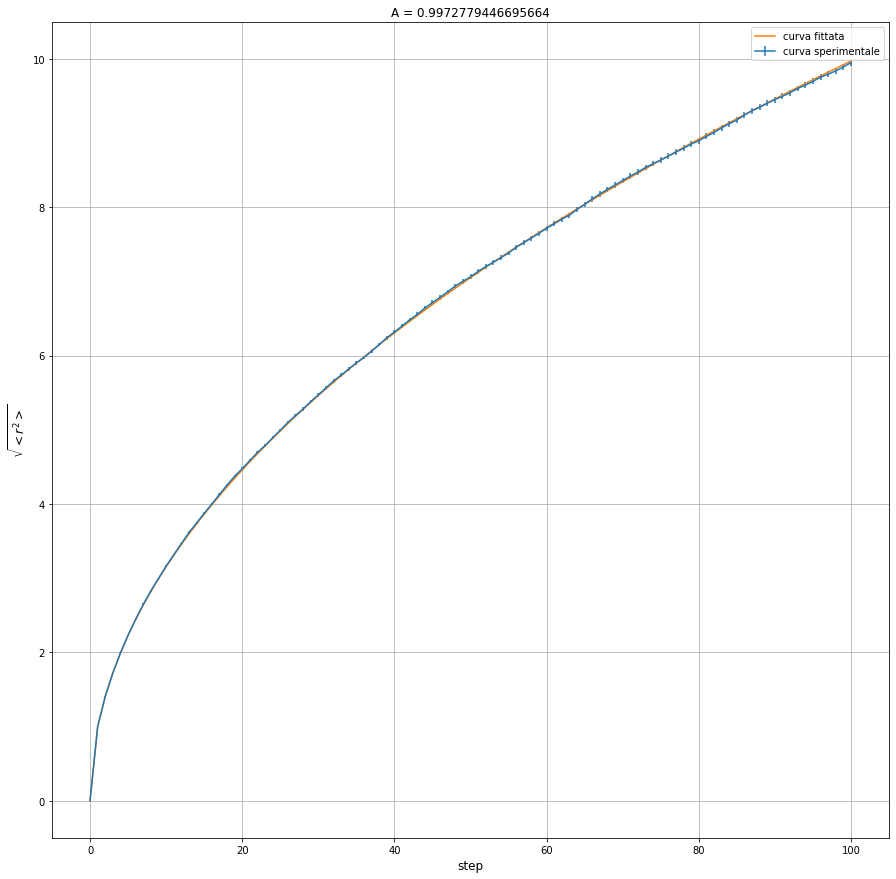

In [38]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

filename = "esercizio02_2/cubic.txt"

step = []
mean = []
mean_err = []

f = open(filename, 'r')

for row in f:
    row = row.split(" ")
    step.append(row[0])
    mean.append(row[1])
    mean_err.append(row[2])
    
step_ = [float(x_step) for x_step in step]
mean_ = [float(x_mean) for x_mean in mean]
mean_err_ = [float(x_mean_err) for x_mean_err in mean_err]

step_.insert(0, 0)
mean_.insert(0, 0)
mean_err_.insert(0, 0)

plt.figure(figsize=[15, 15])
plt.errorbar(step_, mean_, yerr = mean_err_, label = "curva sperimentale")
  
plt.xlabel('step', fontsize = 12)
plt.ylabel('$\sqrt {<r^2>}$', fontsize = 12)
  
plt.title('Cubic RW', fontsize = 20)
plt.grid(True)

#fit dei dati con una radice quadrata
def sqr_rt(x, A):
    y = A*np.sqrt(x)
    return y

parameters, covariance = curve_fit(sqr_rt, step_, mean_)
fitted = []

for i in range(np.size(step_)):
    fitted.append(sqr_rt(step_[i],parameters[0])) 

plt.plot(step_, fitted, label = "curva fittata")  
plt.title("A = "+str(parameters[0]))
plt.legend()
plt.show()

La simulazione, effettuata ripetendo $10^4$ random walks, mostra un andamento della $\sqrt{<r^2>_{RW}}$ come una radice quadrata, indicando un comportamento di tipo diffusivo. Ho effettuato infatti un fit dei dati sperimentali con una funzione del tipo 
$$f(x) = A\sqrt{x}$$
Il coefficiente moltiplicatico della radice è pari circa a 1, e corrisponde alla lunghezza dello step.

## Random Walk isotropo

Ho ripetuto l'analisi con un random walk isotroopo:

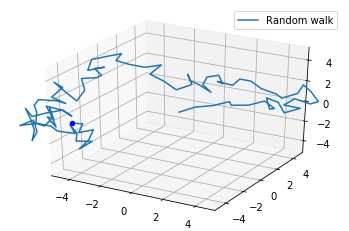

In [39]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

dataCubic = np.loadtxt("esercizio02_2/isoJourn.dat")
x = dataCubic[:,0]
y = dataCubic[:,1]
z = dataCubic[:,2]

ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)

ax.plot(x, y, z, label='Random walk')
ax.scatter(x[-1], y[-1], z[-1], c='b', marker='o')   # End point
ax.legend()
plt.show()

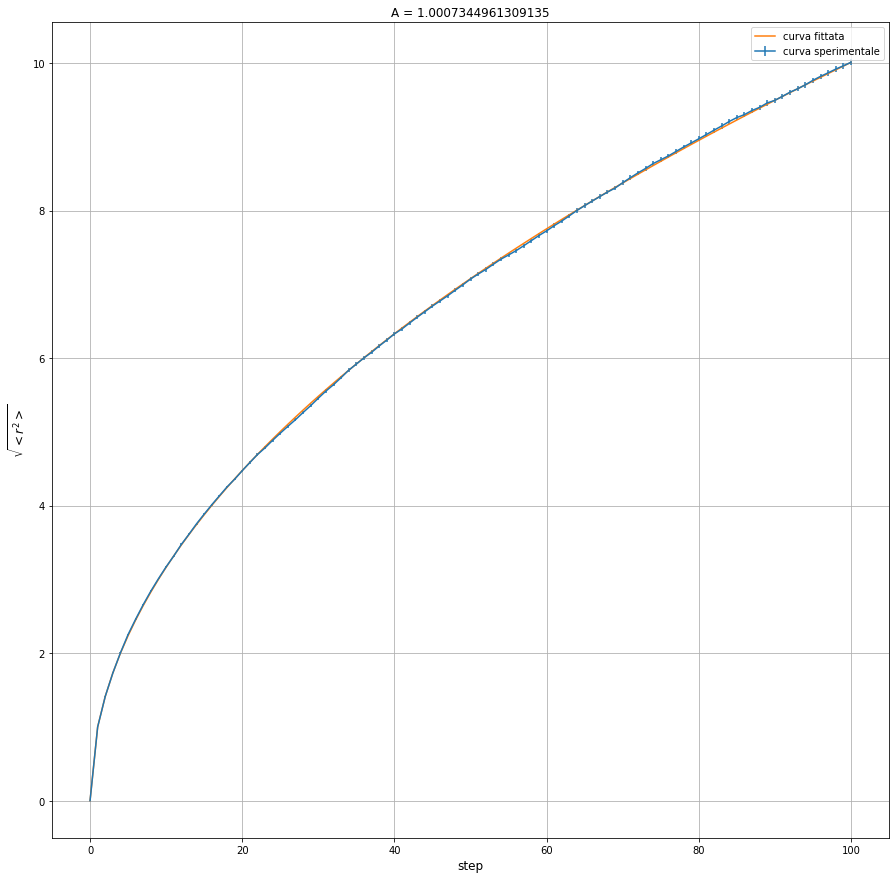

In [40]:
filename = "esercizio02_2/isotropic.txt"

step = []
mean = []
mean_err = []

f = open(filename, 'r')

for row in f:
    row = row.split(" ")
    step.append(row[0])
    mean.append(row[1])
    mean_err.append(row[2])
    
step_ = [float(x_step) for x_step in step]
mean_ = [float(x_mean) for x_mean in mean]
mean_err_ = [float(x_mean_err) for x_mean_err in mean_err]

step_.insert(0, 0)
mean_.insert(0, 0)
mean_err_.insert(0, 0)

plt.figure(figsize=[15, 15])
plt.errorbar(step_, mean_, yerr = mean_err_, label = "curva sperimentale")
  
plt.xlabel('step', fontsize = 12)
plt.ylabel('$\sqrt {<r^2>}$', fontsize = 12)
  
plt.title('Cubic RW', fontsize = 20)
plt.grid(True)

#fit dei dati con una radice quadrata
def sqr_rt(x, A):
    y = A*np.sqrt(x)
    return y

parameters, covariance = curve_fit(sqr_rt, step_, mean_)
fitted = []

for i in range(np.size(step_)):
    fitted.append(sqr_rt(step_[i],parameters[0])) 

plt.plot(step_, fitted, label = "curva fittata")  
plt.title("A = "+str(parameters[0]))
plt.legend()
plt.show()

Come prima, la simulazione mostra un andamento della $\sqrt{<r^2>_{RW}}$ come una radice quadrata, indicando un comportamento di tipo diffusivo. Ho effettuat anche in questo caso un fit dei dati sperimentali con una funzione del tipo 
$$f(x) = A\sqrt{x}$$
Il coefficiente moltiplicatico della radice è pari circa a 1, e corrisponde alla lunghezza dello step.